In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.regression.linear_model import OLS


In [218]:
master_df=pd.read_csv('/Users/andreewerner/Desktop/mlb-master_df-data.csv')

In [219]:
master_df.shape

(42728, 28)

In [220]:
master_df.isnull().sum()

date                       0
team                       0
opponent                   0
rank                       0
gb                         0
time                       0
attendance                 0
streak                     0
double_header              0
runs_per_game              0
runs_moving_avg            0
runs_allowed_moving_avg    0
win_pct                    0
opening_day                0
wins_and_losses            0
win_percentage             0
day_game                   0
day                        0
weekday                    0
weekday_name               0
month                      0
year                       0
stadium                    0
capacity                   0
bat_age                    0
pitch_age                  0
top_player_stat            0
division_game              0
dtype: int64

In [221]:
master_df.dtypes

date                        object
team                        object
opponent                    object
rank                         int64
gb                         float64
time                        object
attendance                   int64
streak                       int64
double_header                int64
runs_per_game              float64
runs_moving_avg            float64
runs_allowed_moving_avg    float64
win_pct                    float64
opening_day                  int64
wins_and_losses              int64
win_percentage             float64
day_game                     int64
day                          int64
weekday                      int64
weekday_name                object
month                        int64
year                         int64
stadium                     object
capacity                     int64
bat_age                    float64
pitch_age                  float64
top_player_stat            float64
division_game                int64
dtype: object

In [222]:
master_df.head(10)

,date,team,opponent,rank,gb,time,attendance,streak,double_header,runs_per_game,...,weekday,weekday_name,month,year,stadium,capacity,bat_age,pitch_age,top_player_stat,division_game
0,2000-04-03,ANA,NYY,0,0.0,0 days 03:02:00.000000000,42704,0,0,0.000000,...,0,Monday,4,2000,Angel Stadium,45050,27.6,28.9,8.3,0
1,2000-04-04,ANA,NYY,3,-1.0,0 days 03:20:00.000000000,25818,-1,0,2.000000,...,1,Tuesday,4,2000,Angel Stadium,45050,27.6,28.9,8.3,0
2,2000-04-05,ANA,NYY,4,-2.0,0 days 03:01:00.000000000,24560,-2,0,2.500000,...,2,Wednesday,4,2000,Angel Stadium,45050,27.6,28.9,8.3,0
3,2000-08-11,ANA,NYY,3,-8.5,0 days 03:01:00.000000000,43169,-1,0,5.269565,...,4,Friday,8,2000,Angel Stadium,45050,27.6,28.9,8.3,0
4,2000-08-12,ANA,NYY,3,-9.0,0 days 03:18:00.000000000,43394,1,0,5.293103,...,5,Saturday,8,2000,Angel Stadium,45050,27.6,28.9,8.3,0
5,2000-08-13,ANA,NYY,3,-8.0,0 days 03:10:00.000000000,43411,2,0,5.324786,...,6,Sunday,8,2000,Angel Stadium,45050,27.6,28.9,8.3,0
6,2000-06-02,ATL,NYY,1,6.5,0 days 03:08:00.000000000,48524,-1,0,5.269231,...,4,Friday,6,2000,Turner Field,49586,30.8,31.4,8.2,0
7,2000-06-03,ATL,NYY,1,5.5,0 days 03:57:00.000000000,48423,-2,0,5.207547,...,5,Saturday,6,2000,Turner Field,49586,30.8,31.4,8.2,0
8,2000-06-04,ATL,NYY,1,5.5,0 days 03:07:00.000000000,47756,1,0,5.314815,...,6,Sunday,6,2000,Turner Field,49586,30.8,31.4,8.2,0
9,2000-07-24,BAL,NYY,4,-10.0,0 days 03:14:00.000000000,47450,-1,0,5.175258,...,0,Monday,7,2000,Oriole Park,48876,32.2,29.1,5.6,1


In [223]:
master_df['date']=pd.to_datetime(master_df['date'])
master_df.drop(['date','time','weekday'],axis=1,inplace=True)

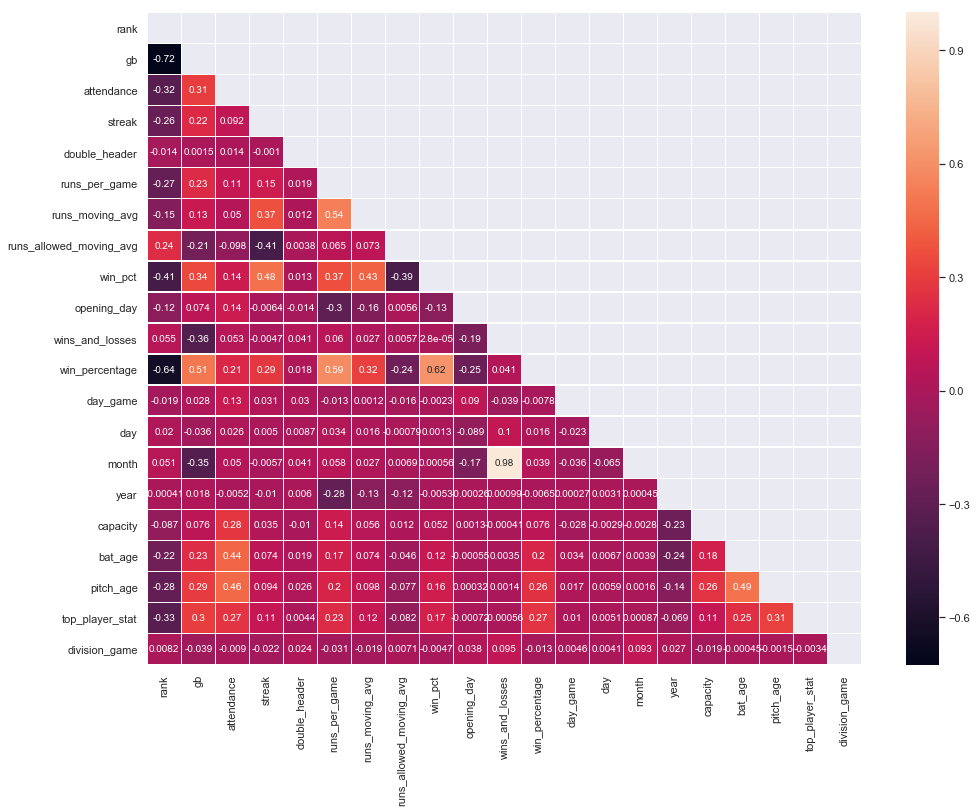

In [224]:
fig = plt.gcf()
fig.set_size_inches(16 , 12)
master_df_corr=master_df.corr()

mask = np.zeros_like(master_df_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(master_df_corr, linewidth = 0.5, mask=mask, annot=True, annot_kws={'size': 10})

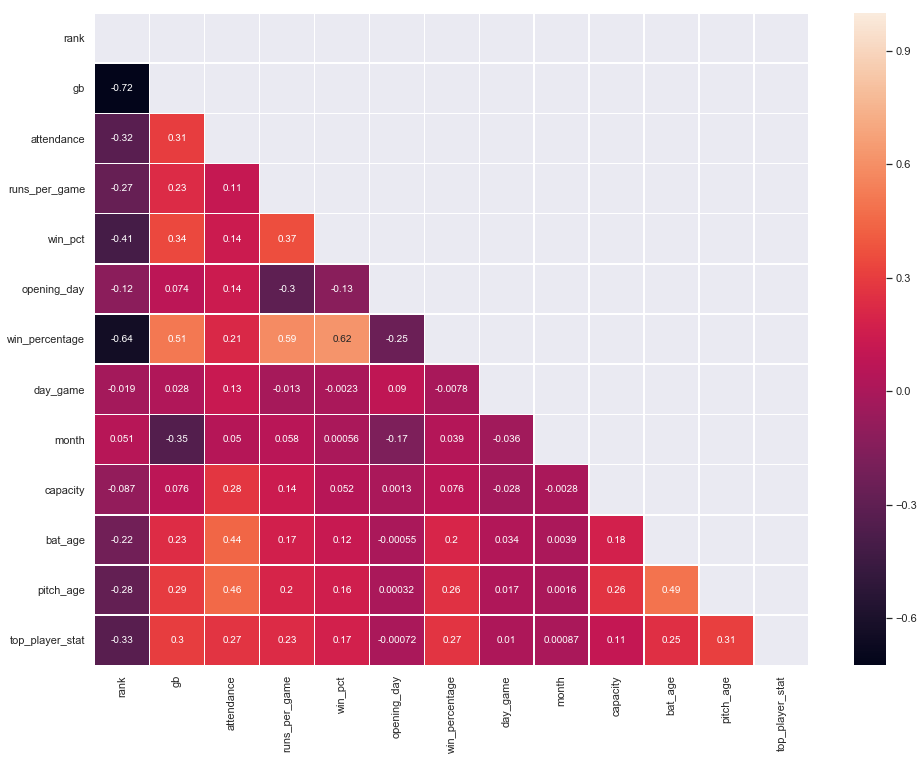

In [225]:
#drop features with very low correlations 
master_df.drop(['streak','double_header','runs_moving_avg','runs_allowed_moving_avg','wins_and_losses','day','year','division_game'],axis=1,inplace=True)

# look at correlation and heat map for smaller feature set

fig = plt.gcf()
fig.set_size_inches(16 , 12)
master_df_corr=master_df.corr()

mask = np.zeros_like(master_df_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(master_df_corr, linewidth = 0.5, mask=mask, annot=True, annot_kws={'size': 10})

In [214]:
master_df_corr

,rank,gb,attendance,runs_per_game,win_pct,opening_day,win_percentage,day_game,month,capacity,bat_age,pitch_age,top_player_stat
rank,1.000000,-0.724828,-0.324517,-0.272849,-0.412601,-0.119569,-0.641278,-0.018660,0.050932,-0.086948,-0.220355,-0.282942,-0.332047
gb,-0.724828,1.000000,0.305609,0.225587,0.343617,0.074384,0.512176,0.028134,-0.351277,0.076327,0.232995,0.292645,0.301796
attendance,-0.324517,0.305609,1.000000,0.111321,0.139165,0.141498,0.214877,0.125475,0.049978,0.277310,0.443717,0.457258,0.268360
runs_per_game,-0.272849,0.225587,0.111321,1.000000,0.366150,-0.301347,0.586095,-0.013331,0.058202,0.137854,0.170406,0.195667,0.230644
win_pct,-0.412601,0.343617,0.139165,0.366150,1.000000,-0.130538,0.620283,-0.002327,0.000565,0.052275,0.118550,0.163179,0.171705
opening_day,-0.119569,0.074384,0.141498,-0.301347,-0.130538,1.000000,-0.250026,0.090308,-0.173499,0.001288,-0.000553,0.000323,-0.000719
win_percentage,-0.641278,0.512176,0.214877,0.586095,0.620283,-0.250026,1.000000,-0.007842,0.038872,0.075727,0.199153,0.258272,0.267950
day_game,-0.018660,0.028134,0.125475,-0.013331,-0.002327,0.090308,-0.007842,1.000000,-0.035955,-0.027852,0.033967,0.016679,0.010174
month,0.050932,-0.351277,0.049978,0.058202,0.000565,-0.173499,0.038872,-0.035955,1.000000,-0.002751,0.003939,0.001641,0.000871
capacity,-0.086948,0.076327,0.277310,0.137854,0.052275,0.001288,0.075727,-0.027852,-0.002751,1.000000,0.177860,0.259264,0.110543


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


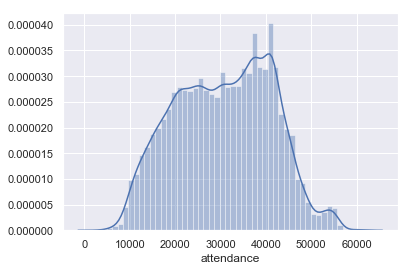

In [211]:
sns.distplot(master_df['attendance'])

In [213]:
# label non-numeric columns
label = preprocessing.LabelEncoder()

master_df['team_label'] = label.fit_transform(master_df['team'])
master_df['opponent_label'] = label.fit_transform(master_df['opponent'])
master_df['stadium_label'] = label.fit_transform(master_df['stadium'])
master_df['weekday_name_label']=label.fit_transform(master_df['weekday_name'])

# drop old columns and define feature matrix and target column 
X=master_df.drop(['team','opponent','stadium','weekday_name','attendance'],axis=1)
y=master_df['attendance']


In [162]:
#baseline model
#X = master_df.loc[:,['rank','gb','streak','double_header','runs_per_game','runs_moving_avg',
                  #'runs_allowed_moving_avg','win_pct','opening_day','wins_and_losses','win_percentage',
                  #'day_game','day','month','year','bat_age','pitch_age','top_player_stat','division_game',
                  #'team_label','opponent_label','stadium_label','weekday_name_label']]

#y = master_df['attendance']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=3)

# model = sm.OLS(y,sm.add_constant(X))
# results = model.fit_transform()

# results.summary()


In [167]:
from statsmodels.tools.tools import add_constant

scaler = StandardScaler()

X_scaled=scaler.fit_transform(X)
X=add_constant(X)
X.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,const,rank,gb,streak,double_header,runs_per_game,runs_moving_avg,runs_allowed_moving_avg,win_pct,opening_day,...,year,capacity,bat_age,pitch_age,top_player_stat,division_game,team_label,opponent_label,stadium_label,weekday_name_label
0,1.0,0,0.0,0,0,0.000000,0.0,4.4,0.0,1,...,2000,45050,27.6,28.9,8.3,0,0,20,1,1
1,1.0,3,-1.0,-1,0,2.000000,2.0,4.4,0.0,0,...,2000,45050,27.6,28.9,8.3,0,0,20,1,5
2,1.0,4,-2.0,-2,0,2.500000,2.5,4.4,0.0,0,...,2000,45050,27.6,28.9,8.3,0,0,20,1,6
3,1.0,3,-8.5,-1,0,5.269565,2.6,3.4,0.2,0,...,2000,45050,27.6,28.9,8.3,0,0,20,1,0
4,1.0,3,-9.0,1,0,5.293103,3.6,2.8,0.3,0,...,2000,45050,27.6,28.9,8.3,0,0,20,1,2


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=55)


In [169]:
model = sm.OLS(y,X)
results = model.fit()
# prediction=results.predict(X_test)
# score=r2_score(y_test,prediction)
# print (score)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     1408.
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:56:17   Log-Likelihood:            -4.4431e+05
No. Observations:               42728   AIC:                         8.887e+05
Df Residuals:                   42703   BIC:                         8.889e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -6.52e+05   1.72e+04    -37.903      0.000   -6.86e+05   -6.18e+05
rank                     -379.4245     46.838     -8.101      0.000    -471.227    -287.622
gb                        168.5718      7.372     22.867      0.000     154.123     183.021
streak                    -46.6080     18.929     -2.462      0.014     -83.709      -9.507
double_header             -76.0793    305.784     -0.249      0.804    -675.422     523.264
runs_per_game             272.9570     71.972      3.793      0.000     131.890     414.024
runs_moving_avg            -1.4347     33.661     -0.043      0.966     -67.412      64.542
runs_allowed_moving_avg  -109.2808     31.444     -3.475      0.001    -170.911     -47.650
win_pct                   164.1919    319.357      0.514      0.607    -461.753     790.137
opening_day               1.27e+04    401.845     31.607      0.000    1.19e+04    1.35e+04
wins_and_losses           -68.8576     17.167     -4.011      0.000    -102.506     -35.209
win_percentage          -1094.4335    643.582     -1.701      0.089   -2355.867     167.000
day_game                 2751.4185     82.864     33.204      0.000    2589.004    2913.833
day                       122.6072     15.663      7.828      0.000      91.908     153.307
month                    2674.6216    464.589      5.757      0.000    1764.019    3585.225
year                      273.3251      8.380     32.615      0.000     256.899     289.751
capacity                    0.3433      0.007     49.137      0.000       0.330       0.357
bat_age                  2196.0310     33.752     65.064      0.000    2129.877    2262.185
pitch_age                1630.5467     33.935     48.050      0.000    1564.034    1697.059
top_player_stat           233.0625     26.661      8.742      0.000     180.806     285.319
division_game            -411.7543     77.867     -5.288      0.000    -564.375    -259.133
team_label                -20.4665      4.177     -4.900      0.000     -28.653     -12.279
opponent_label            -25.7831      4.148     -6.215      0.000     -33.914     -17.652
stadium_label            -129.7273      3.259    -39.800      0.000    -136.116    -123.339
weekday_name_label       -906.7165     19.074    -47.537      0.000    -944.102    -869.331
==============================================================================
Omnibus:                      151.313   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.510
Skew:                           0.026   Prob(JB):                     5.01e-26
Kurtosis:                       2.750   Cond. No.                     2.02e+07
==============================================================================

Warnings:
[1] Standard Errors as

In [170]:
m = LinearRegression()
m.fit(X_train, y_train)
print (m.score(X_train,y_train))
print (m.score(X_test,y_test))

0.4427888174544812
0.4372945014460499


In [171]:
m.score(X_test,y_test)

0.4372945014460499

Text(0,0.5,'Residual')

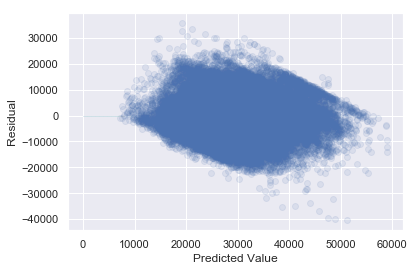

In [195]:

y_pred = results.predict(X)

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,8000,1000),np.linspace(0,0,1000), linestyle='', marker='o', markersize=0.003)

plt.xlabel('Predicted Value')
plt.ylabel('Residual')



# tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
# tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
# master_df=master_df.append(tmp1).append(tmp2)
 
# # plot
# plt.plot( 'x', 'y', data=master_df, linestyle='', marker='o')
# plt.xlabel('Value of X')
# plt.ylabel('Value of Y')
# plt.title('Overplotting looks like that:', loc='left')
 
# plt.plot( 'x', 'y', data=master_df, linestyle='', marker='o', markersize=0.7)
# plt.xlabel('Value of X')
# plt.ylabel('Value of Y')
# plt.title('Overplotting? Try to reduce the dot size', loc='left')


# master_df_sample=master_df.sample(1000)
 
# # Make the plot with this subset
# plt.plot( 'x', 'y', data=master_df_sample, linestyle='', marker='o')
 
# # titles
# plt.xlabel('Value of X')
# plt.ylabel('Value of Y')
# plt.title('Overplotting? Sample your data', loc='left')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


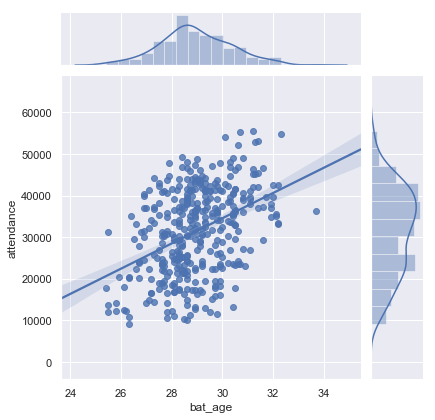

In [179]:
sns.jointplot('bat_age', 'attendance', data=master_df.sample(frac=0.009), kind='reg')


In [184]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [185]:
def add_square_terms(df):    
    
    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly


In [186]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=55)

m = LinearRegression()
m.fit(X_train, y_train)
print('OLS regression score val R^2: %.3f' % m.score(X_val, y_val))
print('OLS regression score val RMSE: %.3f \n' % RMSE(m.predict(X_val), y_val))

m.fit(add_square_terms(X_train), y_train)
print('Degree 2 polynomial regression val R^2: %.3f' 
      % m.score(add_square_terms(X_val), y_val))
print('Degree 2 polynomial regression score val RMSE: %.3f' 
      % RMSE(m.predict(add_square_terms(X_val)), y_val))

OLS regression score val R^2: 0.437
OLS regression score val RMSE: 7937.328 

Degree 2 polynomial regression val R^2: 0.495
Degree 2 polynomial regression score val RMSE: 7518.765


In [ ]:
# #Ridge
# from sklearn.linear_model import RidgeCV
# # perform 10-fold cross-validation
# rcv = RidgeCV(cv=10)
# #train and score 
# rcv.fit(X2_train, y2_train)
# train_score_ridge = rcv.score(X2_train, y2_train)
# test_score_ridge = rcv.score(X2_test, y2_test)
# train_score_ridge,test_score_ridge

In [ ]:
# #Lasso
# # variable selection and regularization
# from sklearn.linear_model import LassoCV
# #perform 5 cross-val, and train the model using training dataset
# lcv = LassoCV(cv=5, random_state=0).fit(X2_train, y2_train)
# train_score_lasso = lcv.score(X2_train, y2_train)
# test_score_lasso = lcv.score(X2_test, y2_test)
# train_score_lasso, test_score_lasso

Text(0,0.5,'Residual')

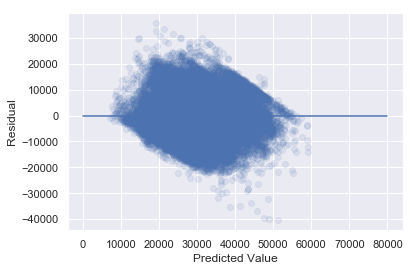

In [188]:

y_pred = results.predict((X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,80000,1000),np.linspace(0,0,1000),)
        
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
